In [10]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00


In [11]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import model_selection

random_state=1234

## データの読み込み

In [12]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')

In [13]:
train.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,23.425076,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,14.921164,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,4.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


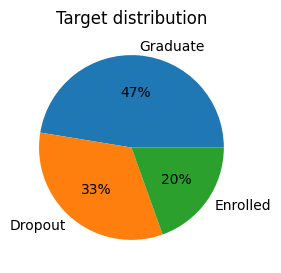

In [14]:
temp = train.Target.value_counts()
temp

plt.figure(figsize=(6, 3))
plt.pie(temp, labels=temp.index, autopct="%.0f%%")
plt.title('Target distribution')
plt.show()

In [15]:
y_train = train[['Target']]
X_train = train.drop(columns=['Target'])

In [16]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
id,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,0,6,7,6,12.428571,0,11.1,0.6,2.02
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,0,6,9,0,0.000000,0,11.1,0.6,2.02
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,0,6,0,0,0.000000,0,16.2,0.3,-0.92
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,0,8,11,7,12.820000,0,11.1,0.6,2.02
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,0,7,12,6,12.933333,0,7.6,2.6,0.32


In [17]:
y_train.head()

,Target
id,
0,Graduate
1,Dropout
2,Dropout
3,Enrolled
4,Graduate


In [18]:
for column in X_train.columns:
    # クロス集計表の作成
    crosstab = pd.crosstab(X_train[column], y_train['Target'])

    # 正規化して割合にする
    crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

    # ヒートマップの描画
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab_normalized, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f'Heatmap of {column} vs Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# numpyに変換
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

## LightGBMで学習

In [20]:
# 目的関数の設定
def objective(trial):

    #ハイパーパラメータの集合を定義する
    model = GBC()
    params = {"learning_rate":trial.suggest_int("learning_rate",
                                               0, 1
                                              ),
              "n_estimators":trial.suggest_int("n_estimators",
                                            1, 1000
                                           ),
              "min_samples_split":trial.suggest_int("min_samples_split",
                                            2, 500
                                           ),
              "max_depth":trial.suggest_int("max_depth",
                                            1, 100
                                           )
             }
    classifier_obj = model.set_params(**params)
    score = model_selection.cross_val_score(classifier_obj, X_train, y_train, n_jobs=-1, cv=10)
    accuracy = score.mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
# 最適解の出力
print(f"The best value is : \n {study.best_value}")
print(f"The best parameters are : \n {study.best_params}")


[I 2024-06-30 17:44:14,637] A new study created in memory with name: no-name-bf9703ae-1b28-4579-9e41-3e84a1762637
[I 2024-06-30 20:32:58,295] Trial 0 finished with value: 0.8145272223707488 and parameters: {'learning_rate': 1, 'n_estimators': 315, 'min_samples_split': 348, 'max_depth': 59}. Best is trial 0 with value: 0.8145272223707488.
[I 2024-06-30 21:28:08,460] Trial 1 finished with value: 0.8175722957950688 and parameters: {'learning_rate': 1, 'n_estimators': 204, 'min_samples_split': 54, 'max_depth': 58}. Best is trial 1 with value: 0.8175722957950688.
[W 2024-06-30 22:46:20,223] Trial 2 failed with parameters: {'learning_rate': 1, 'n_estimators': 242, 'min_samples_split': 420, 'max_depth': 62} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-20-563fc0a6beba>", line 20, in objective
    

KeyboardInterrupt: 